Builiding a Machine Learning Model to Determine Churn in Telecommunication Company

In [120]:
#Loading Data
import pandas as pd 
import numpy as np
df=pd.read_csv(r'C:\Users\HP\Downloads\Telco_Customer_Churn_Dataset  (3).csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [121]:
df.shape

(7043, 21)

In [122]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [123]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [124]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [125]:
#Changing Columns Names
import re
df.columns = [re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', col) for col in df.columns]
df.columns = [col.replace(' ', '_').lower() for col in df.columns]
df.head(10)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [126]:
df.describe()

,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [127]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [128]:
df.payment_method.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [129]:
df.contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [130]:
#Removing Outliers
# Selecting only numerical columns
num_cols = df.select_dtypes(include=['number'])
#IQR
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (num_cols < lower_bound) | (num_cols > upper_bound)
outliers.sum()


senior_citizen     1142
tenure                0
monthly_charges       0
dtype: int64

In [131]:
df.senior_citizen.unique()

array([0, 1], dtype=int64)

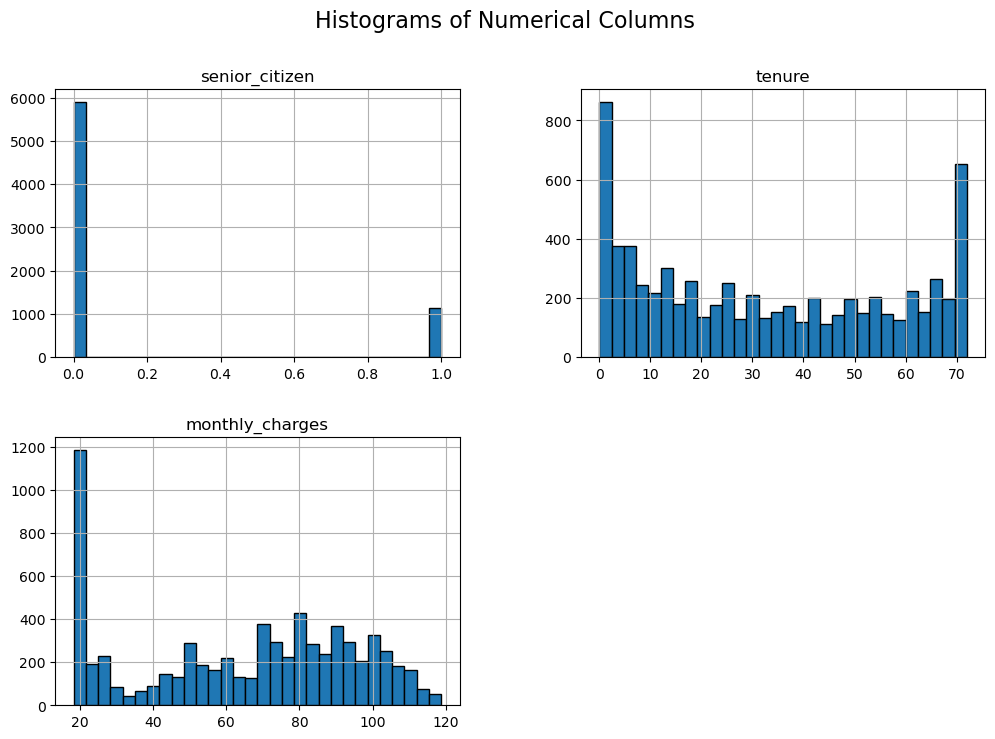

In [132]:
#Visualizing the Data
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=['number'])
num_cols.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.show()


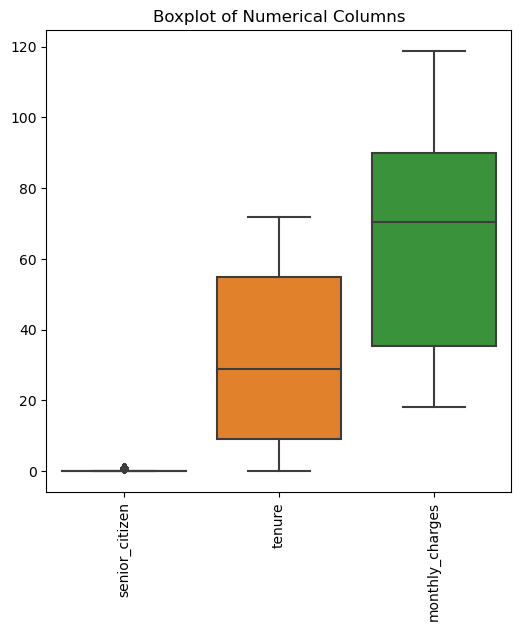

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = df.select_dtypes(include=['number'])
plt.figure(figsize=(6, 6))
sns.boxplot(data=num_cols)
plt.xticks(rotation=90) 
plt.title("Boxplot of Numerical Columns")
plt.show()


In [134]:
churn_counts = df['churn'].value_counts(normalize=True) * 100
print(churn_counts)


No     73.463013
Yes    26.536987
Name: churn, dtype: float64


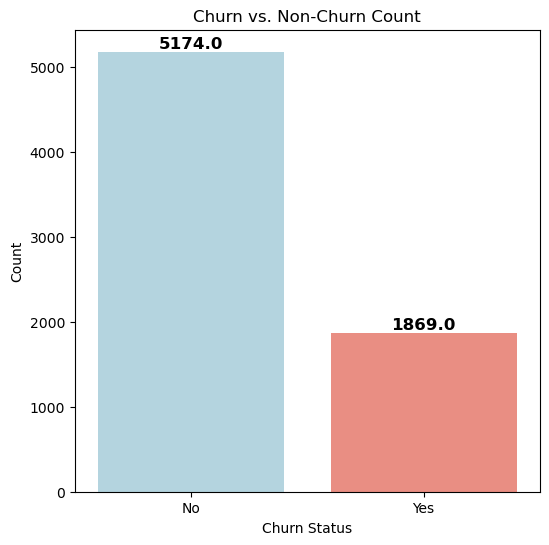

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
ax = sns.countplot(x=df['churn'], palette=['lightblue', 'salmon'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.title("Churn vs. Non-Churn Count")
plt.xlabel("Churn Status")
plt.ylabel("Count")

plt.show()



In [136]:
df.columns


Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [137]:
#Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 
                       'internet_service', 'online_security', 'online_backup', 'device_protection', 
                       'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 
                       'paperless_billing', 'payment_method', 'churn']
#Encoding
binary_cols = ['gender', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn']
label_enc = LabelEncoder()
for col in binary_cols:
    df[col] = label_enc.fit_transform(df[col])  # Yes/No → 1/0, Male/Female → 1/0

df = pd.get_dummies(df, columns=['multiple_lines', 'internet_service', 'online_security', 
                                 'online_backup', 'device_protection', 'tech_support', 
                                 'streaming_tv', 'streaming_movies', 'contract', 'payment_method'], 
                     drop_first=True)  # drop_first=True to avoid multicollinearity
df.head()


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0


In [138]:
#Dropping unnecessary Column
df.drop('customer_id', axis=1, inplace=True)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [139]:
print(df['total_charges'].dtype)

object


In [140]:
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
print(df['total_charges'].dtype)

float64


In [141]:
#Scaling

cols_to_scale = ['tenure','monthly_charges','total_charges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [142]:
# Class count
count_class_0, count_class_1 = df.churn.value_counts()

# Dividing by class
df_class_0 = df[df['churn'] == 0]
df_class_1 = df[df['churn'] == 1]

In [143]:
# Undersampling 0-class and concating the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.churn.value_counts())



Random under-sampling:
0    1869
1    1869
Name: churn, dtype: int64


In [116]:
X = df_test_under.drop('churn',axis='columns')
y = df_test_under['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [117]:
y_train.value_counts()

0    1495
1    1495
Name: churn, dtype: int64

In [118]:
print(X_train.isnull().sum().sum()) 
print(X_test.isnull().sum().sum())  
import numpy as np
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train[X_train.index] 
y_test = y_test[X_test.index]     
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


5
0
Accuracy: 0.7633689839572193
Confusion Matrix:
 [[286  88]
 [ 89 285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       374
           1       0.76      0.76      0.76       374

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



In [119]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7633689839572193
Confusion Matrix:
 [[286  88]
 [ 89 285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       374
           1       0.76      0.76      0.76       374

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748

